#Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [3]:
# Read data
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# Apply one-hot encoding to nominal variables
cols_nom = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder()

# Fit on training data
encoder.fit(train_df[cols_nom])

# Transform both training and test datasets
train_encoded = pd.DataFrame(encoder.transform(train_df[cols_nom]).toarray(),
                             columns=encoder.get_feature_names_out())
test_encoded = pd.DataFrame(encoder.transform(test_df[cols_nom]).toarray(),
                            columns=encoder.get_feature_names_out())

# Reset index and merge encoded columns back
train_encoded.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.drop(columns=cols_nom, inplace=True)
test_df.drop(columns=cols_nom, inplace=True)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)


In [4]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,0,1,1463,23,3,2,0,64,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,933,9,4,3,0,94,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,0,1,253,11,3,1,1,43,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,0,1,373,1,2,4,0,47,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
1,31,1,1463,23,3,2,0,64,2,2,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
2,41,1,933,9,4,3,0,94,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,22,1,253,11,3,1,1,43,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
4,23,1,373,1,2,4,0,47,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,36,2,493,10,2,1,0,42,3,1,...,0.000000,0.449785,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.449785,0.550215
2372,29,1,1250,21,3,1,0,38,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
2373,24,1,688,17,3,2,0,57,3,1,...,0.000000,0.000000,0.0,0.0,0.632241,0.367759,0.0,0.000000,0.632241,0.367759
2374,24,1,1252,11,1,4,1,74,3,1,...,0.585870,0.414130,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000


In [6]:
# fitting Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG, display

CART = DecisionTreeClassifier()
CART.fit(X_train_resampled, y_train_resampled)

train_score = CART.score(X_train, y_train)
test_score = CART.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.998 and 0.827 over the testing data


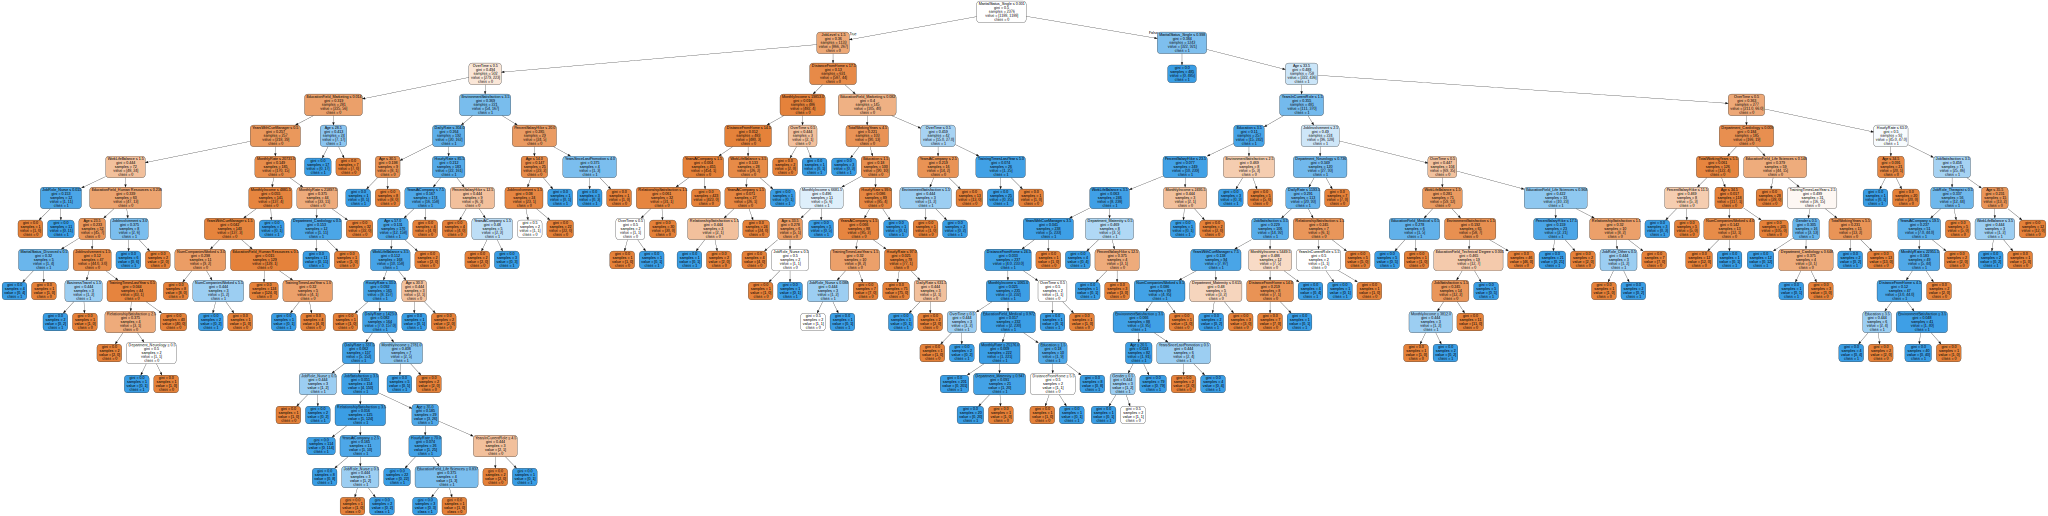

In [7]:
# Visualize the decision tree
dot_data = Source(export_graphviz(CART, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [8]:
# print out the most important features and their values
feature_importances = CART.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.345497
0                               Age    0.109622
14                         OverTime    0.108141
9                          JobLevel    0.066176
22               YearsInCurrentRole    0.029653
5           EnvironmentSatisfaction    0.029154
30         EducationField_Marketing    0.024917
8                    JobInvolvement    0.023348
20                  WorkLifeBalance    0.019323
7                        HourlyRate    0.018619
12                      MonthlyRate    0.018067
3                  DistanceFromHome    0.017673
2                         DailyRate    0.016704
10                  JobSatisfaction    0.015279
11                    MonthlyIncome    0.013974
21                   YearsAtCompany    0.013649
15                PercentSalaryHike    0.013487
29     EducationField_Life Sciences    0.013060
4                         Education    0.011539
19            TrainingTimesLastYear    0

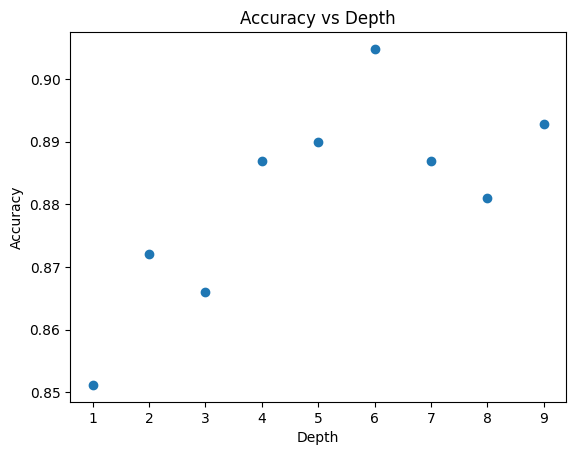

The best performing depth is: 6


In [9]:
depths = range(1, 10)
accuracy = pd.Series(index=depths, dtype=float)

for depth in depths:
  CART.set_params(max_depth=depth)
  CART.fit(X_train, y_train)
  accuracy[depth] = CART.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
print(f"The best performing depth is: {accuracy.idxmax()}")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator= CART,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=1,
    n_jobs=-1,
    return_train_score=True)  

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using decision tree is 0.895522388 with a max depth of 4 and a min samples split of 39


In [11]:

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd


rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7, 10],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}


rf_model = RandomForestClassifier(random_state=42)
bagging_base = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model,param_grid=rf_param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print("\nRandom Forest Best Parameters:")
print(rf_grid_search.best_params_)
print(f"Best Cross-Validation Score: {rf_grid_search.best_score_}")

rf_pred = rf_grid_search.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Results with Best Parameters:")
print(f"Test Set Accuracy: {rf_accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

bagging_grid_search = GridSearchCV(estimator=bagging_base,param_grid=bagging_param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)
bagging_grid_search.fit(X_train_resampled, y_train_resampled)

print("\nBagging Best Parameters:")
print(bagging_grid_search.best_params_)
print(f"Best Cross-Validation Score: {bagging_grid_search.best_score_}")

bagging_pred = bagging_grid_search.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print("\nBagging Results with Best Parameters:")
print(f"Test Set Accuracy: {bagging_accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, bagging_pred))


feature_importance = pd.DataFrame({'Feature': X_train_resampled.columns,'Importance': rf_grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 15 Most Important Features (Random Forest):")
print(feature_importance.head(15))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Random Forest Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.961734630694383

Random Forest Results with Best Parameters:
Test Set Accuracy: 0.8869047619047619

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       289
           1       0.65      0.43      0.51        47

    accuracy                           0.89       336
   macro avg       0.78      0.69      0.72       336
weighted avg       0.87      0.89      0.88       336

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Bagging Best Parameters:
{'estimator__max_depth': 10, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}
Best Cross-Validation Score: 0.9596

Bagging Results with Best Parameters:
Test Set Accuracy: 0.8928571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.91      